### Title: Prediction visualization for Neural network and Ridge regressin

Author: Yiran Jing

Date: 15-10-2018

In [2]:
from collections import Counter
import pandas as pd
import csv
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from collections import defaultdict
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series
from matplotlib import pyplot
from time_series import ts_plot,ts_plot2,ts_plot3,acf_pacf_plot,hist,modify_time_format,epoch_seconds_to_timestamp
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import glob, os
from matplotlib import pyplot as plt
from time_series import plot_regressions,plot_time_decomposition,time_series_SA,time_series_weather_SA,group_holiday_plot,bonxcox_transf
from time_series import difference,first_diff,first_seasonal_diff,seasonal_diff,data_time,data_origin_first_seasonal_firstSeasonal
from time_series import draw_acf_acf,draw_diff_plot,draw_diff_plot
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

from numpy.random import seed
seed(1)

import pandas as pd
pd.options.display.max_columns = 999

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Import models from scikit learn module
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Viualization NN model

In [48]:
ridge_res_train = pd.read_csv('../data/residuals_ridge_train_181028.csv')
del ridge_res_train['train_index']
ridge_res_test = pd.read_csv('../data/residuals_ridge_test_181028.csv')
del ridge_res_test['test_index']

ridge_res_test.Timestamp = pd.to_datetime(ridge_res_test.period,format='%Y-%m-%d %H:%M') 
ridge_res_test.index = ridge_res_test.Timestamp
ridge_res_test = ridge_res_test.sort_index()

ridge_res_train.Timestamp = pd.to_datetime(ridge_res_train.period,format='%Y-%m-%d %H:%M') 
ridge_res_train.index = ridge_res_train.Timestamp
ridge_res_train = ridge_res_train.sort_index()

In [49]:
nn_res_train = pd.read_csv('../data/residuals_nn_train_181028.csv')
del nn_res_train['train_index']
nn_res_test = pd.read_csv('../data/residuals_nn_test_181028.csv')
del nn_res_test['test_index']

nn_res_test.Timestamp = pd.to_datetime(nn_res_test.period,format='%Y-%m-%d %H:%M') 
nn_res_test.index = nn_res_test.Timestamp
nn_res_test = nn_res_test.sort_index()

nn_res_train.Timestamp = pd.to_datetime(nn_res_train.period,format='%Y-%m-%d %H:%M') 
nn_res_train.index = nn_res_train.Timestamp
nn_res_train = nn_res_train.sort_index()

In [50]:
nn_all = pd.concat([nn_res_train,nn_res_test])
ridge_all = pd.concat([ridge_res_train,ridge_res_test])

In [51]:
df = pd.read_csv('../data/shorter_clean_data_26_10_2018.csv',)
data = df[1656:]
data.Timestamp = pd.to_datetime(data.period,format='%Y-%m-%d %H:%M') 
data.index = data.Timestamp
data.head()

,period,demand,air_temp,price
period,,,,
2016-06-05 13:00:00,2016-06-05 13:00,1192.34,14.60,96.75
2016-06-05 13:30:00,2016-06-05 13:30,1168.29,14.35,110.76
2016-06-05 14:00:00,2016-06-05 14:00,1114.31,14.10,78.23
2016-06-05 14:30:00,2016-06-05 14:30,1069.12,14.10,109.05
2016-06-05 15:00:00,2016-06-05 15:00,1070.66,14.10,170.96


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15795 entries, 2016-06-05 13:00:00 to 2017-04-30 14:00:00
Data columns (total 4 columns):
period      15795 non-null object
demand      15795 non-null float64
air_temp    15795 non-null float64
price       15795 non-null float64
dtypes: float64(3), object(1)
memory usage: 617.0+ KB


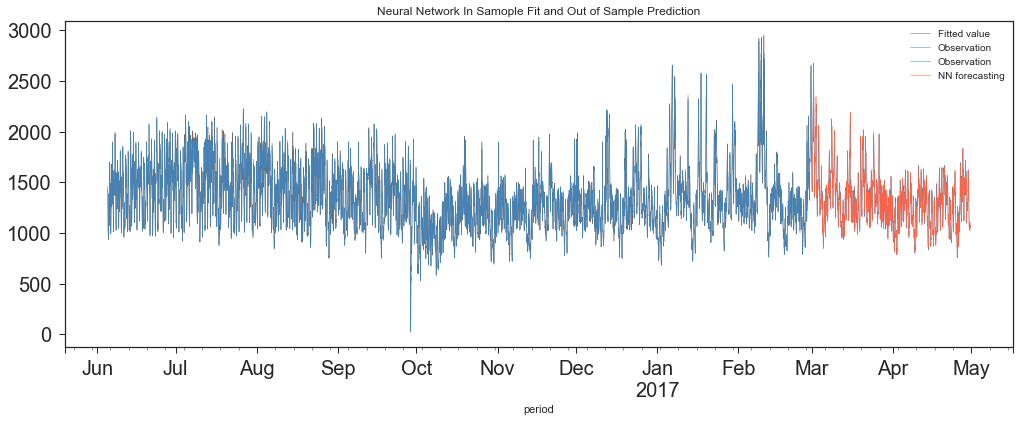

In [59]:
#Plotting data
nn_res_train['predictions'].plot(figsize=(17,6), title= 'Neural Network In Samople Fit and Out of Sample Prediction', fontsize=20,
                                        label= 'Fitted value',linewidth=0.5, color = 'dimgrey')
nn_res_train['y_train'].plot(figsize=(17,6),label= 'Observation',linewidth=0.5, color = 'steelblue')
nn_res_test['y_test'].plot(figsize=(17,6), linewidth=0.5, label= 'Observation', color = 'steelblue')

nn_res_test['predictions'].plot(figsize=(17,6), label= 'NN forecasting', color = 'tomato',linewidth=0.5)
plt.legend()
plt.show()

**Good in sample of fit (better than AR model) and out of sample fit! **

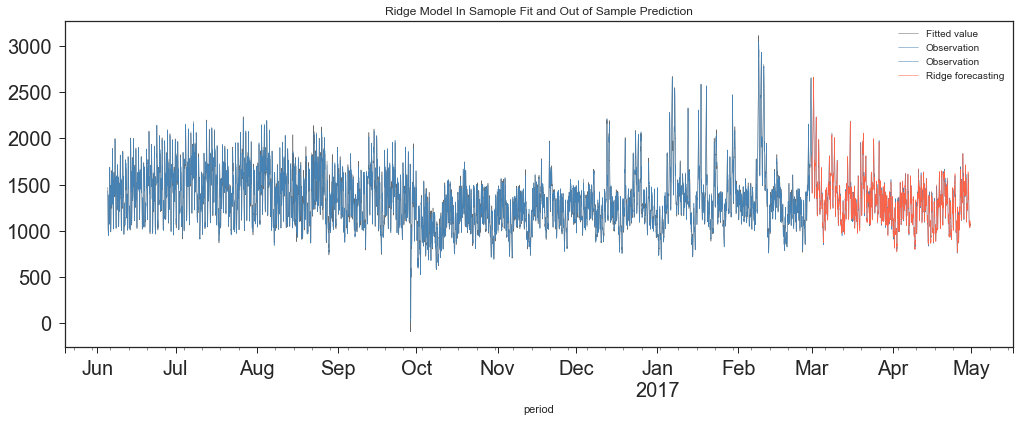

In [58]:
#Plotting data
ridge_res_train['predictions'].plot(figsize=(17,6), title= 'Ridge Model In Samople Fit and Out of Sample Prediction', fontsize=20,
                                        label= 'Fitted value',linewidth=0.5, color = 'dimgrey')
ridge_res_train['y_train'].plot(figsize=(17,6),label= 'Observation',linewidth=0.5, color = 'steelblue')
ridge_res_test['y_test'].plot(figsize=(17,6), linewidth=0.5, label= 'Observation', color = 'steelblue')

ridge_res_test['predictions'].plot(figsize=(17,6), label= 'Ridge forecasting', color = 'tomato',linewidth=0.5)
plt.legend()
plt.show()